# Exploratory Data Analysis: Biomedical Text Classification

This notebook explores the cleaned biomedical abstracts dataset with extracted categories.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import itertools
from pprint import pprint

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

## 1. Load and Explore the Data

In [29]:
# Load the dataset with categories
df = pd.read_csv('cleaned_for_eda.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.sample(5)

Dataset shape: (1999, 12)
Columns: ['PMID', 'Title', 'Abstract', 'Journal', 'Year', 'Authors', 'Cleaned_Abstract', 'Categories', 'Research_Type', 'Trial_Phase', 'Diseases', 'Chemicals']


,PMID,Title,Abstract,Journal,Year,Authors,Cleaned_Abstract,Categories,Research_Type,Trial_Phase,Diseases,Chemicals
579,40106901,N-acetylserotonin derivative ameliorates hypoxic-ischemic brain damage by promoting PINK1/Parkin...,Neonatal hypoxic-ischemic brain damage is the main cause of hypoxic-ischemic encephalopathy and ...,International immunopharmacology,2025.0,Fang Fang; Jiaxin Tang; Jiaqing Geng; Chengzhi Fang; Binghong Zhang,neonatal hypoxic ischemic brain damage main cause hypoxic ischemic encephalopathy cerebral palsy...,hypoxic-ischemic brain damage; hypoxic-ischemic encephalopathy; cerebral palsy; hypothermia; mit...,NaN,NaN,hypoxic-ischemic brain damage; hypoxic-ischemic encephalopathy; cerebral palsy; hypothermia; mit...,n-acetylserotonin; oxygen-glucose deprivation/reoxygenation; ogd/r; hioc
69,40497971,Autophagy-Unlocking New Dimensions in the Pathology and Treatment of Depression.,Depression is a widespread mental disorder whose impact on an individual's health extends far be...,Cells,2025.0,Qiang Luo; Yulong Zhao; Peng Ren; Xu Liu; Yingjian Chen; Qianru Ying; Junjie Zhou,depression widespread mental disorder impact individual health extend far psychological dimensio...,depression; mental disorder; antidepressant; review,review,NaN,depression; mental disorder,antidepressant
209,40362405,GAL-201 as a Promising Amyloid-β-Targeting Small-Molecule Approach for Alzheimer's Disease Treat...,Soluble oligomeric forms of Amyloid-β (Aβ) are considered the major toxic species leading to the...,International journal of molecular sciences,2025.0,Katrin Riemann; Jeldrik von Ahsen; Tamara Böhm; Martin Schlegel; Matthias Kreuzer; Thomas Fenzl;...,soluble oligomeric form amyloid β aβ consider major toxic specie lead neurodegeneration underlie...,neurodegeneration; alzheimer's disease; ad; spine loss; toxicity; dipeptide; bioavailable; aβ-de...,NaN,NaN,neurodegenerative disorder; alzheimers disease; spine loss; toxicity,dipeptide; bioavailable; aβ-derived
1500,39487447,Investigation in the cannabigerol derivative VCE-003.2 as a disease-modifying agent in a mouse m...,"The cannabigerol derivative VCE-003.2, which has activity at the peroxisome proliferator-activat...",Behavioral and brain functions : BBF,2024.0,Sonia Burgaz; Elisa Navarro; Santiago Rodríguez-Carreiro; Carmen Navarrete; Martin Garrido-Rodrí...,cannabigerol derivative vce-003.2 activity peroxisome proliferator activate receptor γ afford ne...,parkinson's disease; pd; mitochondrial dysfunction; neuroinflammation; cannabigerol; tyrosine,NaN,NaN,parkinsons disease; mitochondrial disorder; neuroinflammation,cannabigerol; tyrosine
40,40537890,Effects of Perilla Seed Pomace Extract on Aging-Induced Cognitive Dysfunction in SAMP8 Mice.,"Perilla seed pomace and its constituent phytochemicals have anti-inflammatory, antioxidant, and ...",Journal of microbiology and biotechnology,2025.0,Haeun Lee; Tae Youl Ha; Yun Tai Kim; Min Young Um,perilla seed pomace constituent phytochemical anti inflammatory antioxidant anti aging benefit e...,cognitive decline; neuronal cell death; cognitive impairment; cognitive deficits; hydrogen perox...,NaN,NaN,cognitive decline; neuronal cell death,hydrogen peroxide; feso; glutathione


In [30]:
# Basic info about the dataset
print("Dataset Info:")
print(f"Total abstracts: {len(df)}")
print(f"Abstracts with categories: {df['Categories'].notna().sum()}")
print(f"Abstracts with research types: {df['Research_Type'].notna().sum()}")
print(f"Abstracts with trial phases: {df['Trial_Phase'].notna().sum()}")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:
Total abstracts: 1999
Abstracts with categories: 1999
Abstracts with research types: 598
Abstracts with trial phases: 19

Missing values:
PMID                   0
Title                  0
Abstract               0
Journal                0
Year                   2
Authors                2
Cleaned_Abstract       0
Categories             0
Research_Type       1401
Trial_Phase         1980
Diseases               9
Chemicals            234
dtype: int64


In [31]:
# Find rows where Categories is missing (NaN) or an empty string after stripping
empty_categories = df[df['Categories'].isnull() | (df['Categories'].str.strip() == '')]
print(f"Number of abstracts with empty Categories: {len(empty_categories)}")
display(empty_categories) 

Number of abstracts with empty Categories: 0


,PMID,Title,Abstract,Journal,Year,Authors,Cleaned_Abstract,Categories,Research_Type,Trial_Phase,Diseases,Chemicals


## 2. Text Analysis

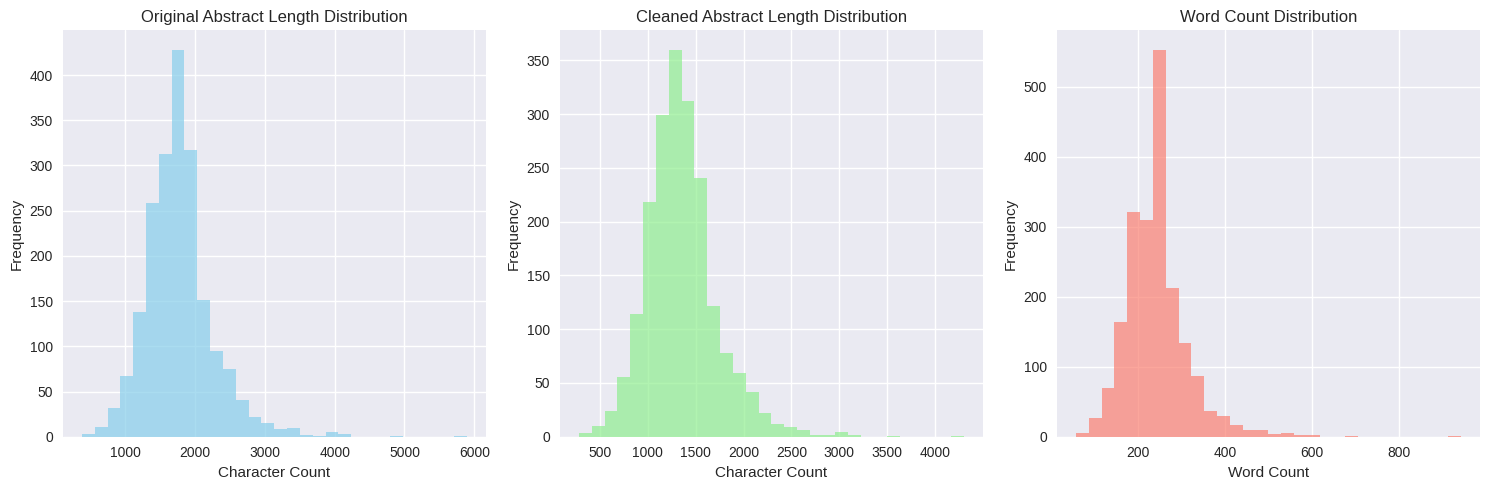


Text Statistics:
Average abstract length: 1779 characters
Average word count: 242 words
Average cleaned length: 1356 characters


In [32]:
# Analyze text lengths
df['Abstract_Length'] = df['Abstract'].str.len()
df['Cleaned_Abstract_Length'] = df['Cleaned_Abstract'].str.len()
df['Word_Count'] = df['Abstract'].str.split().str.len()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original abstract length distribution
axes[0].hist(df['Abstract_Length'], bins=30, alpha=0.7, color='skyblue')
axes[0].set_title('Original Abstract Length Distribution')
axes[0].set_xlabel('Character Count')
axes[0].set_ylabel('Frequency')

# Cleaned abstract length distribution
axes[1].hist(df['Cleaned_Abstract_Length'], bins=30, alpha=0.7, color='lightgreen')
axes[1].set_title('Cleaned Abstract Length Distribution')
axes[1].set_xlabel('Character Count')
axes[1].set_ylabel('Frequency')

# Word count distribution
axes[2].hist(df['Word_Count'], bins=30, alpha=0.7, color='salmon')
axes[2].set_title('Word Count Distribution')
axes[2].set_xlabel('Word Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"\nText Statistics:")
print(f"Average abstract length: {df['Abstract_Length'].mean():.0f} characters")
print(f"Average word count: {df['Word_Count'].mean():.0f} words")
print(f"Average cleaned length: {df['Cleaned_Abstract_Length'].mean():.0f} characters")

## 3. Category Analysis

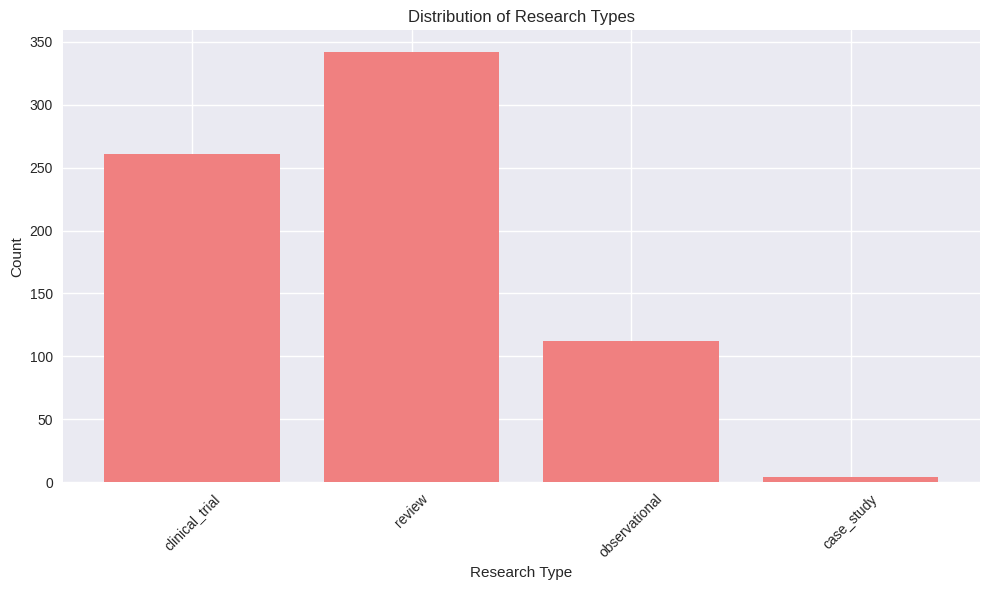


Research Type Distribution:
review: 342
clinical_trial: 261
observational: 112
case_study: 4


In [33]:
# Analyze research types
research_types = []
for types in df['Research_Type'].dropna():
    research_types.extend(types.split('; '))

research_counts = Counter(research_types)

plt.figure(figsize=(10, 6))
plt.bar(research_counts.keys(), research_counts.values(), color='lightcoral')
plt.title('Distribution of Research Types')
plt.xlabel('Research Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nResearch Type Distribution:")
for research_type, count in research_counts.most_common():
    print(f"{research_type}: {count}")

In [34]:
# Show rows where Trial_Phase is not null or not empty
df_with_trial_phase = df[df['Trial_Phase'].notnull() & (df['Trial_Phase'].str.strip() != '')]

# Display the result (nicely in a notebook)
display(df_with_trial_phase)

,PMID,Title,Abstract,Journal,Year,Authors,Cleaned_Abstract,Categories,Research_Type,Trial_Phase,Diseases,Chemicals,Abstract_Length,Cleaned_Abstract_Length,Word_Count
200,40371623,Synergistic Network Pharmacology: Preclinical Validation and Clinical Safety in Acute Ischemic S...,"Most human disease definitions, except for rare and communicable diseases, are based on symptoms...",Journal of the American Heart Association,2025.0,Ana I Casas; Cristian Nogales; Rebecca D Szepanowski; Mahmoud H Elbatreek; Elisa Anastasi; Sepid...,human disease definition rare communicable disease base symptom specific organ causal molecular ...,human disease; acute ischemic stroke; stroke; diabetes; prediabetes; comorbidity; hemorrhagic tr...,clinical_trial,phase_1; phase_2,human disease; stroke; diabet; prediabet; comorbidity; hemorrhagic transformation; infarct; diab...,nitric oxide; guanylate,2141,1660,289
263,40319416,Intrathecal methotrexate in progressive multiple sclerosis: a phase 1 open-label study with long...,Progressive multiple sclerosis (PMS) remains challenging to treat effectively. Intrathecal metho...,Journal of neurology,2025.0,Hadar Kolb; Yuval Shachaf; Karin Fainberg; Maya Golan; Keren Regev; Ifat Vigiser; Lior Fuchs; Av...,progressive multiple sclerosis pms remain challenge treat effectively intrathecal methotrexate i...,multiple sclerosis; pms; post-lp headache; methotrexate; itmtx; 2-9; clinical_trial; review; pha...,clinical_trial; review,phase_1,multiple sclerosi; pms; post-lp headache,methotrexate; itmtx; pms,1707,1307,234
381,40240592,Phase I trial of hES cell-derived dopaminergic neurons for Parkinson's disease.,Parkinson's disease is a progressive neurodegenerative condition with a considerable health and ...,Nature,2025.0,V Tabar; H Sarva; A M Lozano; A Fasano; S K Kalia; K K H Yu; C Brennan; Y Ma; S Peng; D Eidelber...,parkinson disease progressive neurodegenerative condition considerable health economic burden < ...,parkinson's disease; parkinson's disease rating scale; dyskinesias; low-dose; high-dose; 2.7; fl...,clinical_trial; observational,phase_1,parkinsons disease; parkinson's disease; dyskinesia,low-dose; high-dose; fluoro-dopa positron,1611,1256,218
382,40240591,Phase I/II trial of iPS-cell-derived dopaminergic cells for Parkinson's disease.,"Parkinson's disease is caused by the loss of dopamine neurons, causing motor symptoms. Initial c...",Nature,2025.0,Nobukatsu Sawamoto; Daisuke Doi; Etsuro Nakanishi; Masanori Sawamura; Takayuki Kikuchi; Hodaka Y...,parkinson disease cause loss dopamine neuron cause motor symptom initial cell therapy fetal tiss...,parkinson's disease; dyskinesia; parkinson's disease rating scale part iii off score; and five s...,clinical_trial,phase_1,parkinsons disease; dyskinesia; parkinson's disease rating scale part iii off score; and five sh...,dopamine; sup>1-5</sup>. pluripotent stem; potassium; high-dose,1770,1338,233
410,40222103,A polytherapy approach demonstrates therapeutic efficacy for the treatment of SOD1 associated am...,SOD1 mutations are a significant contributor of familial amyotrophic lateral sclerosis (ALS) cas...,EBioMedicine,2025.0,Jeremy S Lum; Mikayla L Brown; Natalie E Farrawell; Rachael Bartlett; Christen G Chisholm; Jody ...,sod1 mutation significant contributor familial amyotrophic lateral sclerosis als case sod1 mutat...,familial amyotrophic lateral sclerosis; als; sod1-associated als; toxicity; reduced motor impair...,clinical_trial,phase_2,familial amyotrophic lateral sclerosi; als; sod1-associated al; toxicity; reduced motor impairme...,ebselen; telbivudine; cet,2731,2176,366
462,40186271,Target oxidative stress-induced disulfidptosis: novel therapeutic avenues in Parkinson's disease.,"Parkinson's disease (PD), a globally prevalent neurodegenerative disorder, has been implicated w...",Molecular brain,2025.0,Junshi Zhang; Tingting Liu; Haojie Wu; Jianshe Wei; Qiumin Qu,parkinson disease pd globally prevalent neurodegenerative disorder implicate oxidative str

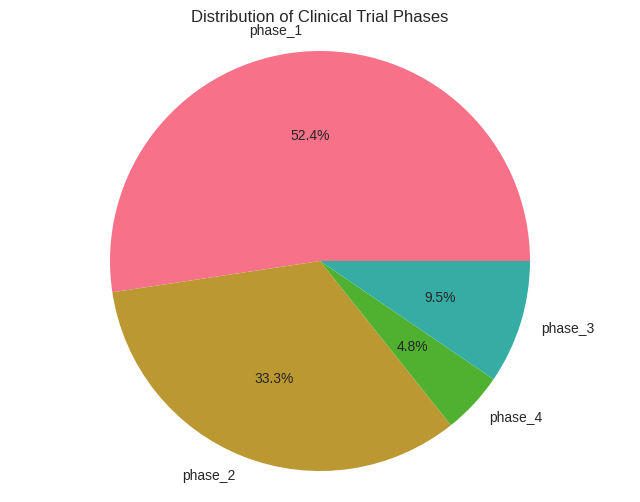


Trial Phase Distribution:
phase_1: 11
phase_2: 7
phase_3: 2
phase_4: 1


In [35]:
# Analyze trial phases
trial_phases = []
for phases in df['Trial_Phase'].dropna():
    trial_phases.extend(phases.split('; '))

phase_counts = Counter(trial_phases)

if phase_counts:
    plt.figure(figsize=(8, 6))
    plt.pie(phase_counts.values(), labels=phase_counts.keys(), autopct='%1.1f%%')
    plt.title('Distribution of Clinical Trial Phases')
    plt.axis('equal')
    plt.show()
    
    print(f"\nTrial Phase Distribution:")
    for phase, count in phase_counts.most_common():
        print(f"{phase}: {count}")
else:
    print("No trial phases found in the dataset.")

## 4. Disease Analysis

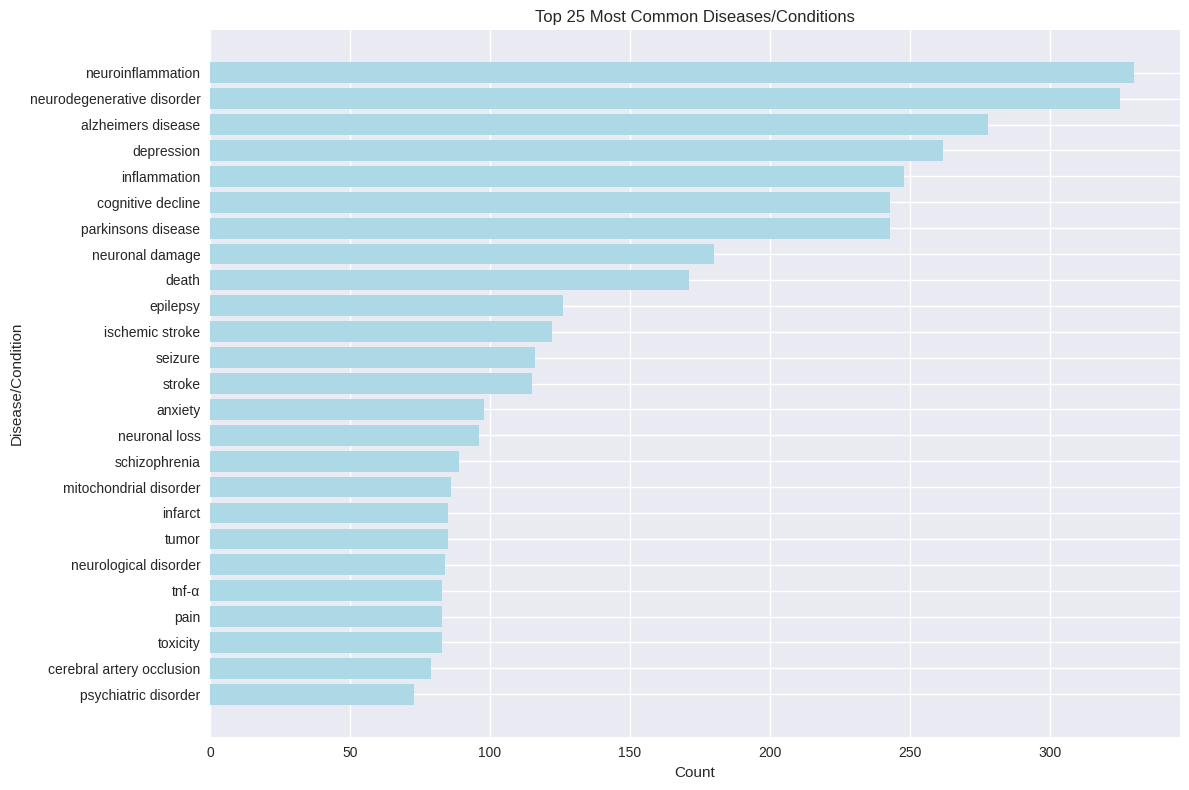


Top 10 Diseases/Conditions:
neuroinflammation: 330
neurodegenerative disorder: 325
alzheimers disease: 278
depression: 262
inflammation: 248
cognitive decline: 243
parkinsons disease: 243
neuronal damage: 180
death: 171
epilepsy: 126


In [36]:
# Analyze diseases
diseases = []

for disease_list in df['Diseases'].dropna():
    diseases.extend(disease_list.split('; '))

disease_counts = Counter(diseases)

# Show top 15 diseases
top_diseases = dict(disease_counts.most_common(25))

plt.figure(figsize=(12, 8))
plt.barh(list(top_diseases.keys()), list(top_diseases.values()), color='lightblue')
plt.title('Top 25 Most Common Diseases/Conditions')
plt.xlabel('Count')
plt.ylabel('Disease/Condition')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nTop 10 Diseases/Conditions:")
for disease, count in disease_counts.most_common(10):
    print(f"{disease}: {count}")

10328


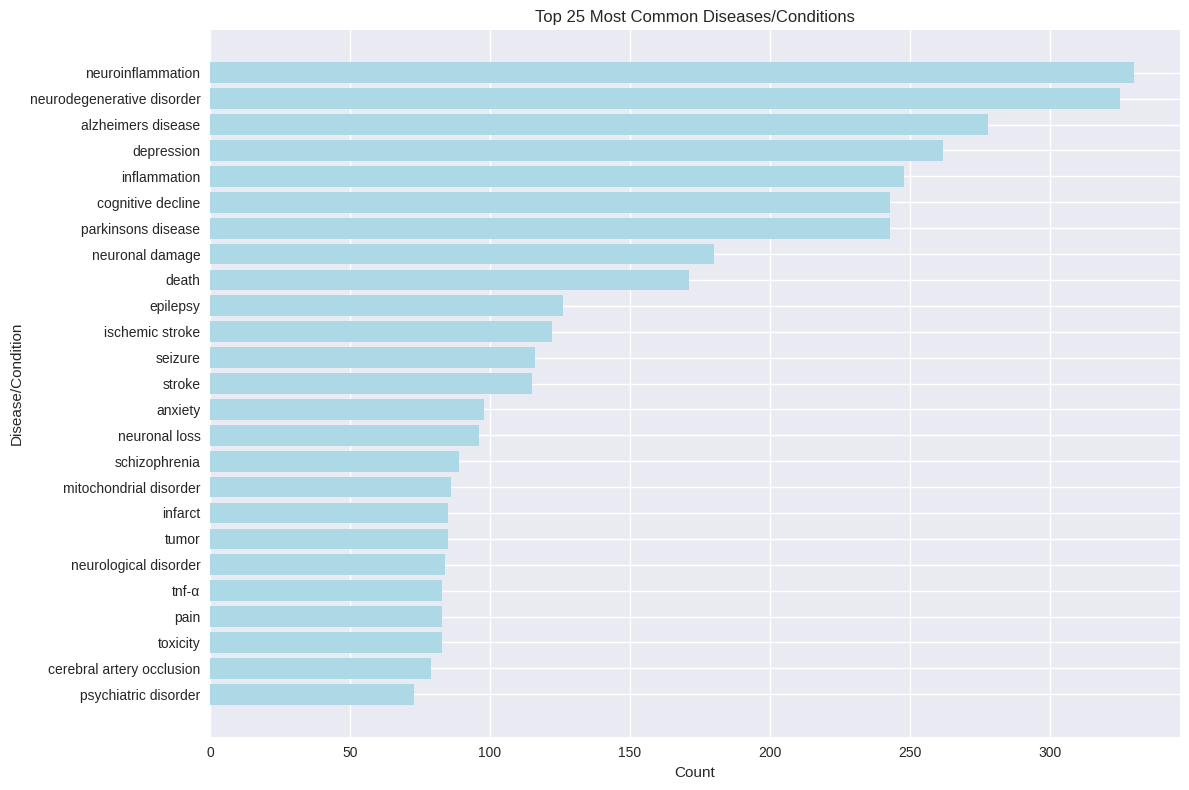


Top 10 Diseases/Conditions:
neuroinflammation: 330
neurodegenerative disorder: 325
alzheimers disease: 278
depression: 262
inflammation: 248
cognitive decline: 243
parkinsons disease: 243
neuronal damage: 180
death: 171
epilepsy: 126


In [37]:
# Analyze diseases
diseases = []

for disease_list in df['Diseases'].dropna():
    diseases.extend(disease_list.split('; '))

disease_counts = Counter(diseases)
print(len(diseases))
# Show top 15 diseases
top_diseases = dict(disease_counts.most_common(25))

plt.figure(figsize=(12, 8))
plt.barh(list(top_diseases.keys()), list(top_diseases.values()), color='lightblue')
plt.title('Top 25 Most Common Diseases/Conditions')
plt.xlabel('Count')
plt.ylabel('Disease/Condition')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nTop 10 Diseases/Conditions:")
for disease, count in disease_counts.most_common(10):
    print(f"{disease}: {count}")


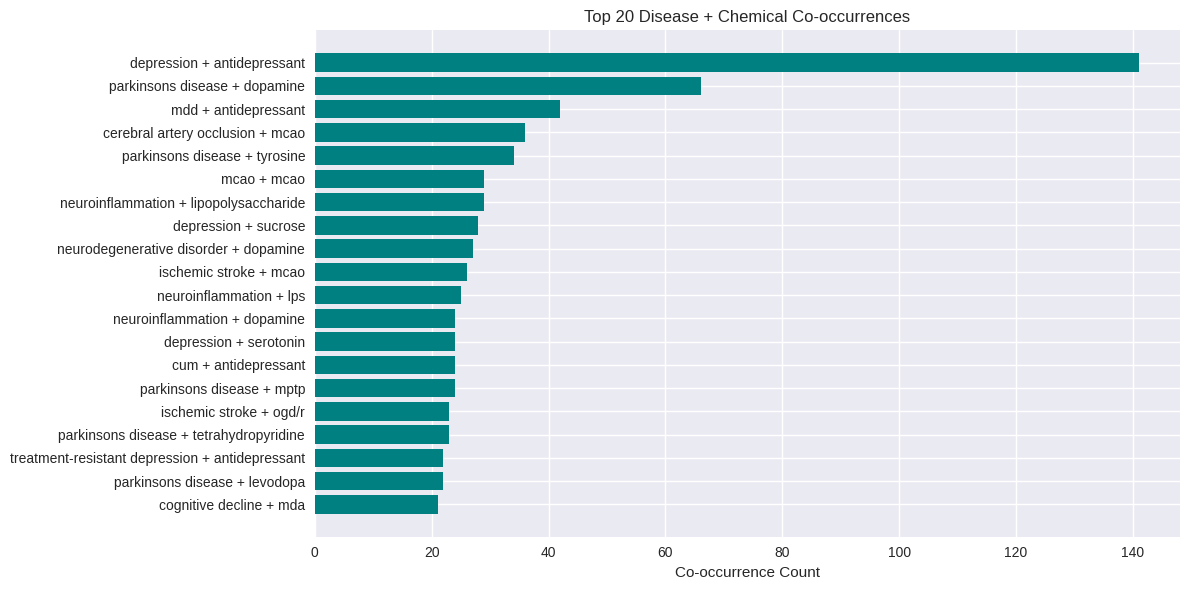

,Disease,Chemical,Count
0,depression,antidepressant,141
1,parkinsons disease,dopamine,66
2,mdd,antidepressant,42
3,cerebral artery occlusion,mcao,36
4,parkinsons disease,tyrosine,34
5,mcao,mcao,29
6,neuroinflammation,lipopolysaccharide,29
7,depression,sucrose,28
8,neurodegenerative disorder,dopamine,27
9,ischemic stroke,mcao,26


In [38]:
# Parse diseases and chemicals into lists
df['Diseases_list'] = df['Diseases'].fillna('').apply(lambda x: [d.strip() for d in x.split(';') if d.strip()])
df['Chemicals_list'] = df['Chemicals'].fillna('').apply(lambda x: [c.strip() for c in x.split(';') if c.strip()])

# Count co-occurrences
pair_counter = Counter()
for diseases, chemicals in zip(df['Diseases_list'], df['Chemicals_list']):
    for pair in itertools.product(diseases, chemicals):
        pair_counter[pair] += 1

# Get top N co-occurring pairs
top_pairs = pair_counter.most_common(20)
diseases_top, chemicals_top, counts_top = zip(*[(d, c, cnt) for (d, c), cnt in top_pairs])

# Create a DataFrame for visualization

cooc_df = pd.DataFrame({
    'Disease': diseases_top,
    'Chemical': chemicals_top,
    'Count': counts_top
})

# Plot as a bar chart
plt.figure(figsize=(12, 6))
plt.barh([f'{d} + {c}' for d, c in zip(diseases_top, chemicals_top)], counts_top, color='teal')
plt.xlabel('Co-occurrence Count')
plt.title('Top 20 Disease + Chemical Co-occurrences')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

# Show the table
cooc_df.head(20)

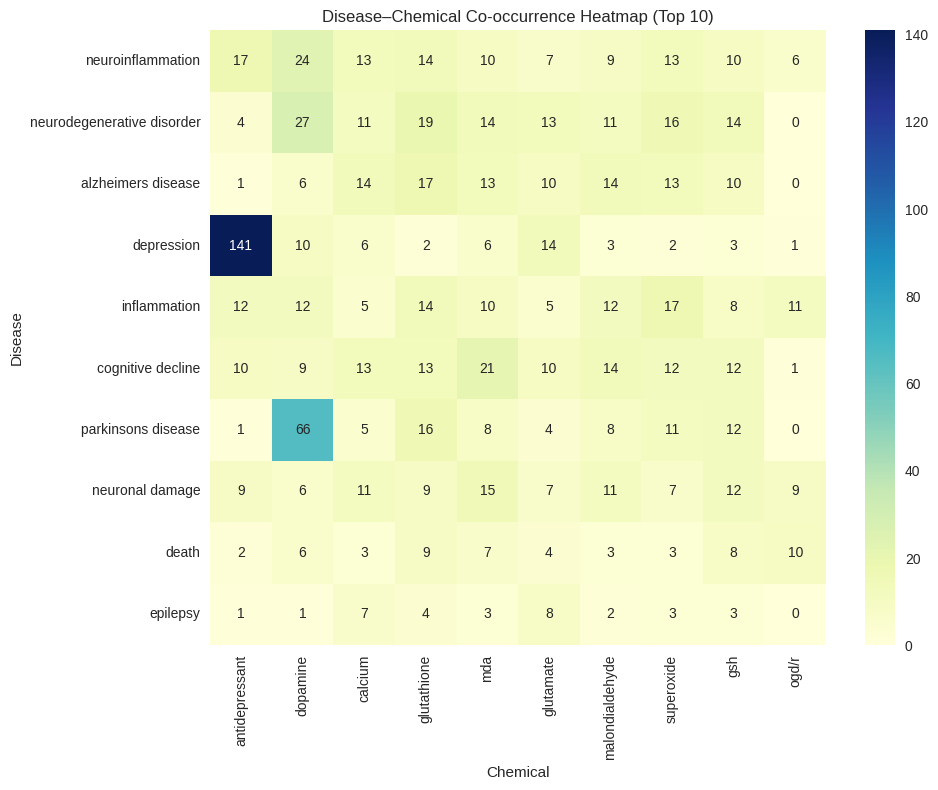

In [39]:

# Get top N diseases and chemicals
N = 10
top_diseases = [d for d, _ in Counter(itertools.chain.from_iterable(df['Diseases_list'])).most_common(N)]
top_chemicals = [c for c, _ in Counter(itertools.chain.from_iterable(df['Chemicals_list'])).most_common(N)]

# Build co-occurrence matrix
cooc_matrix = pd.DataFrame(0, index=top_diseases, columns=top_chemicals)

for diseases, chemicals in zip(df['Diseases_list'], df['Chemicals_list']):
    for d in diseases:
        for c in chemicals:
            if d in top_diseases and c in top_chemicals:
                cooc_matrix.loc[d, c] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(cooc_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Disease–Chemical Co-occurrence Heatmap (Top 10)')
plt.xlabel('Chemical')
plt.ylabel('Disease')
plt.tight_layout()
plt.show()

## 5. Year Analysis

In [40]:
# Convert Year to integer (if possible) and drop NaNs
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)
# Count publications per year
year_counts = df['Year'].value_counts().sort_index()


print(f"\nYear Range: {year_counts.index.min()} - {year_counts.index.max()}")
print(f"Most recent year: {year_counts.index.max()} ({year_counts.iloc[-1]} publications)")
print(f"Oldest year: {year_counts.index.min()} ({year_counts.iloc[0]} publications)")


Year Range: 2024 - 2025
Most recent year: 2025 (1445 publications)
Oldest year: 2024 (552 publications)


## 6. Journal Analysis

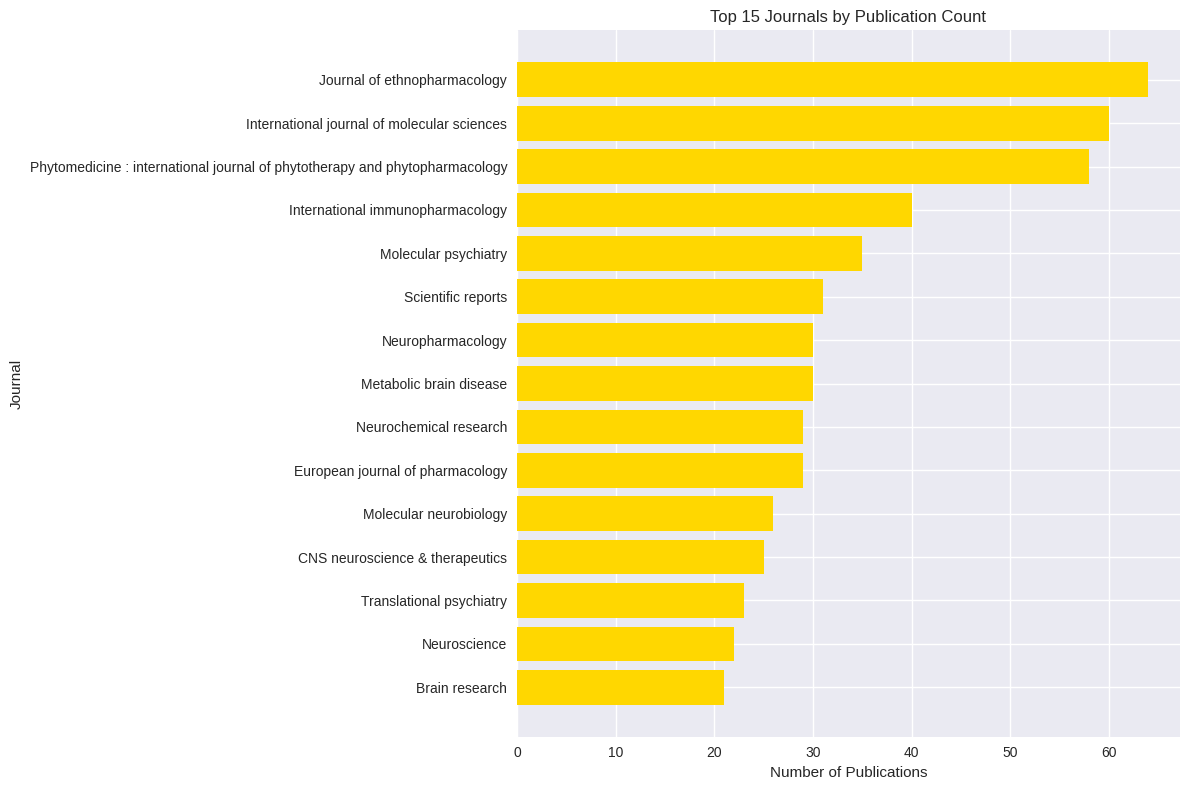


Top 10 Journals:
Journal of ethnopharmacology: 64
International journal of molecular sciences: 60
Phytomedicine : international journal of phytotherapy and phytopharmacology: 58
International immunopharmacology: 40
Molecular psychiatry: 35
Scientific reports: 31
Neuropharmacology: 30
Metabolic brain disease: 30
Neurochemical research: 29
European journal of pharmacology: 29


In [41]:
# Analyze top journals
journal_counts = df['Journal'].value_counts().head(15)

plt.figure(figsize=(12, 8))
plt.barh(range(len(journal_counts)), journal_counts.values, color='gold')
plt.yticks(range(len(journal_counts)), journal_counts.index)
plt.title('Top 15 Journals by Publication Count')
plt.xlabel('Number of Publications')
plt.ylabel('Journal')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nTop 10 Journals:")
for journal, count in journal_counts.head(10).items():
    print(f"{journal}: {count}")

## 7. Summary and Insights

In [42]:
print("=== DATASET SUMMARY ===")
print(f"Total abstracts: {len(df)}")
print(f"Unique journals: {df['Journal'].nunique()}")
print(f"Year range: {df['Year'].min()} - {df['Year'].max()}")
print(f"Abstracts with categories: {df['Categories'].notna().sum()} ({df['Categories'].notna().sum()/len(df)*100:.1f}%)")
print(f"Abstracts with research types: {df['Research_Type'].notna().sum()} ({df['Research_Type'].notna().sum()/len(df)*100:.1f}%)")
print(f"Abstracts with trial phases: {df['Trial_Phase'].notna().sum()} ({df['Trial_Phase'].notna().sum()/len(df)*100:.1f}%)")

print("\n=== KEY INSIGHTS ===")
print(f"• Average abstract length: {df['Abstract_Length'].mean():.0f} characters")
print(f"• Most common research type: {research_counts.most_common(1)[0][0] if research_counts else 'None'}")
print(f"• Most common disease: {disease_counts.most_common(1)[0][0] if disease_counts else 'None'}")
print(f"• Most common chemical: {chemical_counts.most_common(1)[0][0] if chemical_counts else 'None'}")
print(f"• Most active journal: {journal_counts.index[0] if len(journal_counts) > 0 else 'None'}")

=== DATASET SUMMARY ===
Total abstracts: 1997
Unique journals: 563
Year range: 2024 - 2025
Abstracts with categories: 1997 (100.0%)
Abstracts with research types: 597 (29.9%)
Abstracts with trial phases: 19 (1.0%)

=== KEY INSIGHTS ===
• Average abstract length: 1779 characters
• Most common research type: review
• Most common disease: neuroinflammation
• Most common chemical: antidepressant
• Most active journal: Journal of ethnopharmacology
